In [1]:
import time
import json
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob
from elasticsearch import Elasticsearch
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
def calctime(a):
    return time.time()-a

positive=0
negative=0
compound=0


count=0
initime = time.time()
plt.ion()

t = int(calctime(initime))


In [5]:
class TweetStreamListener(StreamListener):

    # on success
    def on_data(self, data):
        global initime
        t = int(calctime(initime))
        all_data = json.loads(data)
        tweet = all_data['text'].encode('utf-8')
        tweet = "".join(re.findall("[a-zA-z]+", tweet))
        tweet = tweet.strip()
        blob = TextBlob(tweet['text'])
        
        print(tweet.sentiment.polarity)
        if tweet.sentiment.polarity < 0:
            sentiment = "negative"
        elif tweet.sentiment.polarity == 0:
            sentiment = "neutral"
        else:
            sentiment = "positive"

        # output sentiment
        print(sentiment)
        es.index(index="sentiment",
                 doc_type="test-type",
                 body={"author": dict_data["user"]["screen_name"],
                       "date": dict_data["created_at"],
                       "message": dict_data["text"],
                       "polarity": tweet.sentiment.polarity,
                       "subjectivity": tweet.sentiment.subjectivity,
                       "sentiment": sentiment})
        return True
     # on failure
    def on_error(self, status):
        print(status)
        if count== 100:
            return False
        else:
            return True


        


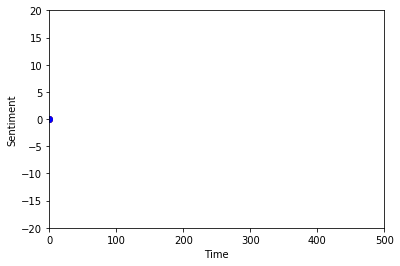

In [6]:
plt.axis([ 0, 500, -20,20])
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.plot([t],[positive],'go',[t] ,[negative],'ro',[t],[compound],'bo')
plt.show()
plt.pause(0.0001)
        


In [7]:
auth=OAuthHandler("9zLXqMM7Vxlww5235zgzY68bo","Z5eQzWrhJhfvPDVqIIwHYMvXT1WN9kCMkmilXwuoEnTqDOQPH5")
auth.set_access_token("959344336549838848f09D838e9YXiU1o4ivFlaTf2Is9KiY5","lr9i6Xr8CKPSnp7RPPMmd3lYJc4ETK1qauS568KxTuNhI")

stream = Stream(auth, TweetStreamListener(count))
stream.filter(track=["Buhari's speech"])

401
401
401
401
401
401


ConnectionError: HTTPSConnectionPool(host='stream.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/filter.json?delimited=length (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x0000002D94E77FD0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))